Load the `ISLR2` and `tidyverse` packages.

In [1]:
library('ISLR2')
library('tidymodels')



Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [2]:
glimpse(Auto)



Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot `mpg`  as a function of `displacement`.

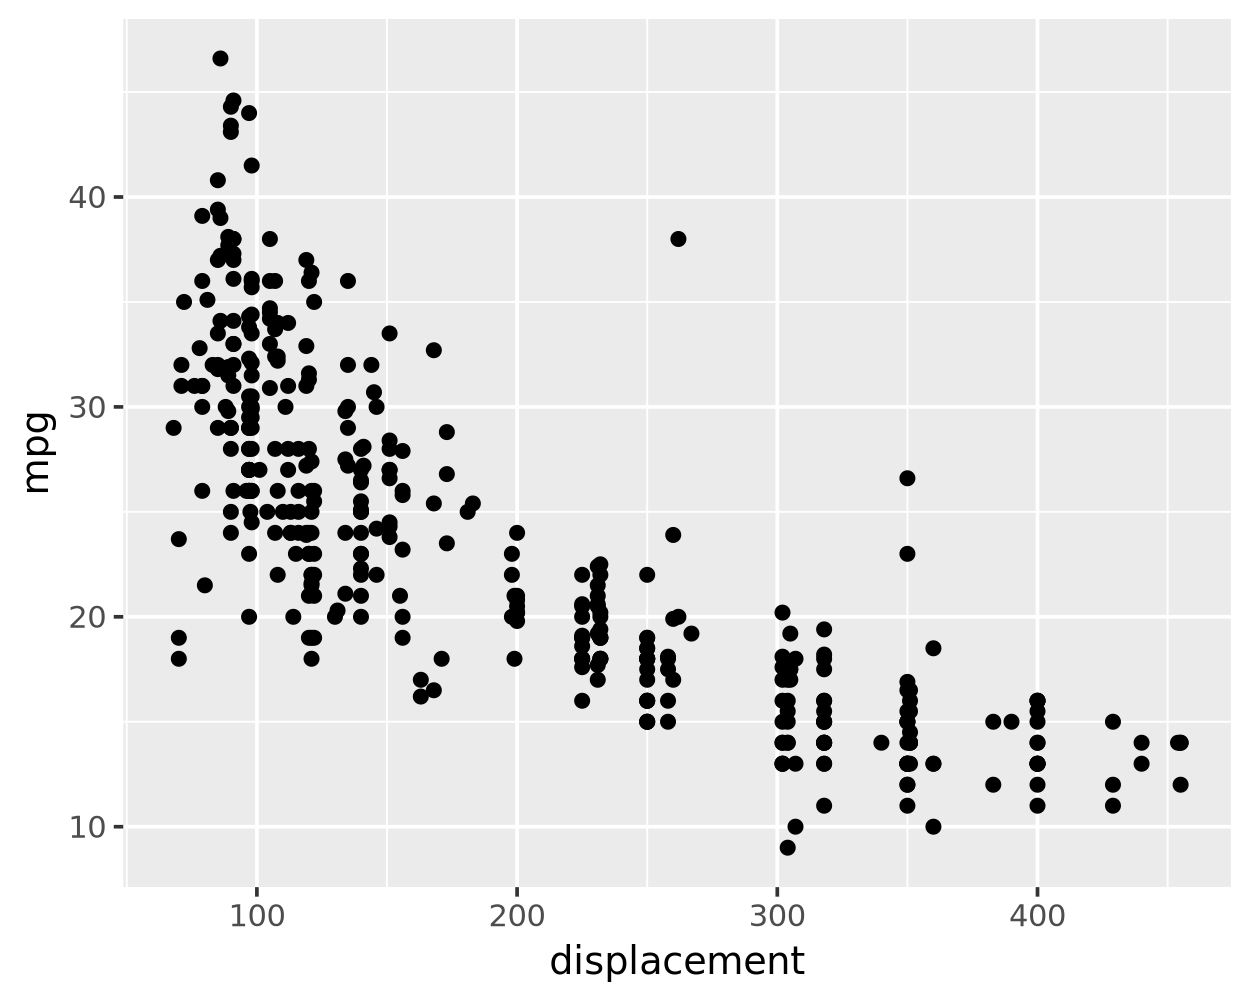

In [3]:
ggplot(Auto, aes(x = displacement, y = mpg)) + geom_point()



❓Does the relationship of `mpg` to `displacement` look linear?

No, it does not look linear.



Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

In [21]:
rec = recipe(mpg ~ ., data = Auto) |>
    step_ns(displacement, deg_free = 3) |>
    step_mutate(cyl_cat = factor(cylinders)) |>
    step_dummy(cyl_cat) |>
    step_rm(cylinders) |>
    prep()

rec |> juice() |> head()

mod = linear_reg() |> set_engine('lm')

mod_fit = mod |> fit(mpg ~ ., data = rec |> juice())

horsepower,weight,acceleration,year,origin,name,mpg,displacement_ns_1,displacement_ns_2,displacement_ns_3,cyl_cat_X4,cyl_cat_X5,cyl_cat_X6,cyl_cat_X8
<int>,<int>,<dbl>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
130,3504,12.0,70,1,chevrolet chevelle malibu,18,0.46190391,0.3589048,0.06739428,0,0,0,1
165,3693,11.5,70,1,buick skylark 320,15,0.35827115,0.3451129,0.25669393,0,0,0,1
150,3436,11.0,70,1,plymouth satellite,18,0.44457364,0.3524473,0.11430298,0,0,0,1
150,3433,12.0,70,1,amc rebel sst,16,0.46540576,0.3610567,0.05480333,0,0,0,1
140,3449,10.5,70,1,ford torino,17,0.46743805,0.3625878,0.04645930,0,0,0,1
198,4341,10.0,70,1,ford galaxie 500,15,-0.01194771,0.3771541,0.63418745,0,0,0,1


Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
“prediction from rank-deficient fit; consider predict(., rankdeficient="NA")”


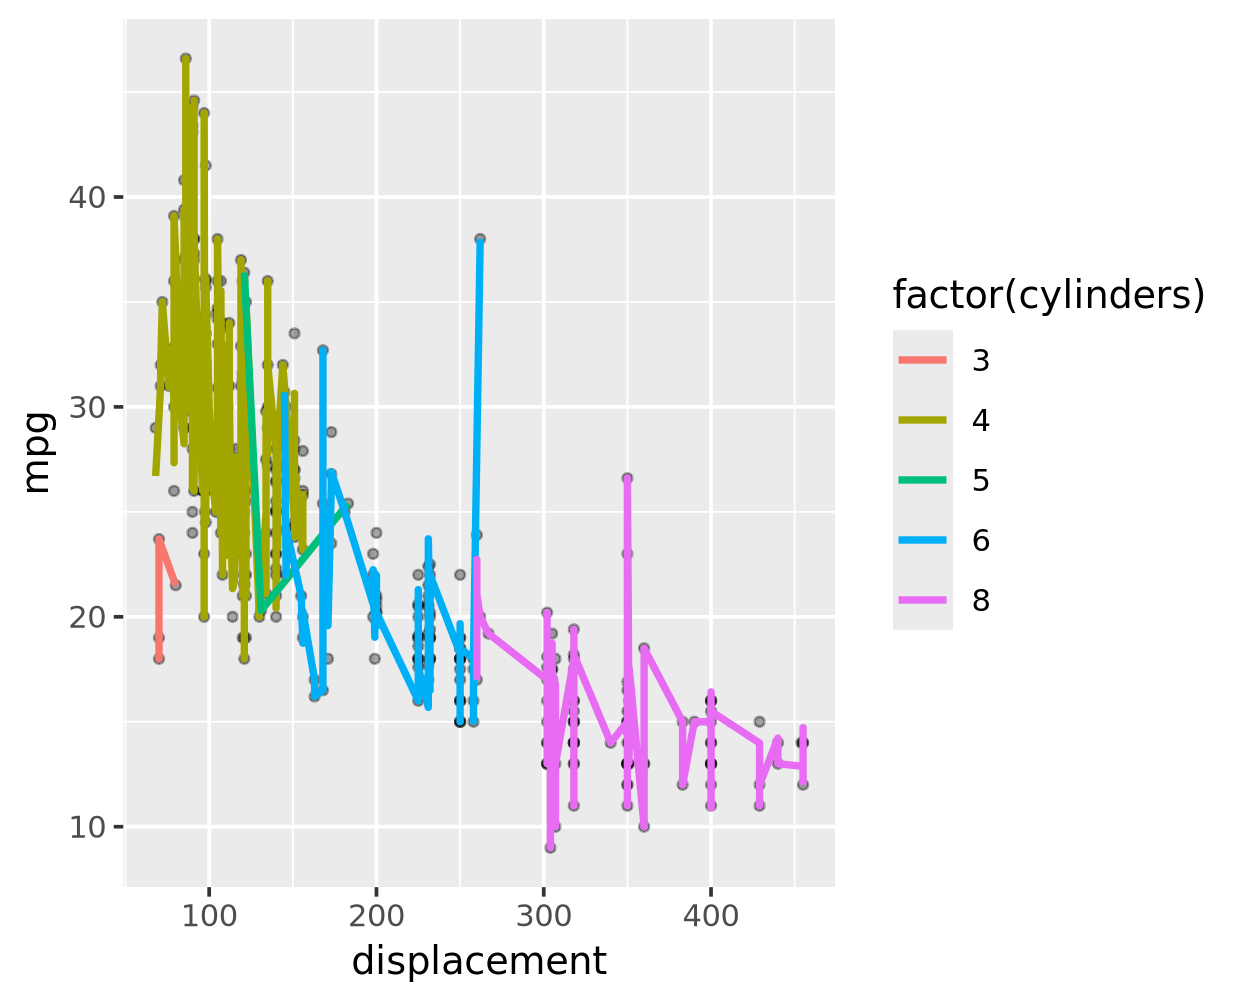

In [22]:
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)

This looks extremely overfitted, so I am not sure if it is supposed to look like that. I tried step_poly and it looked the same way.

Below I'll try to fit it only to each predicted displacement column.

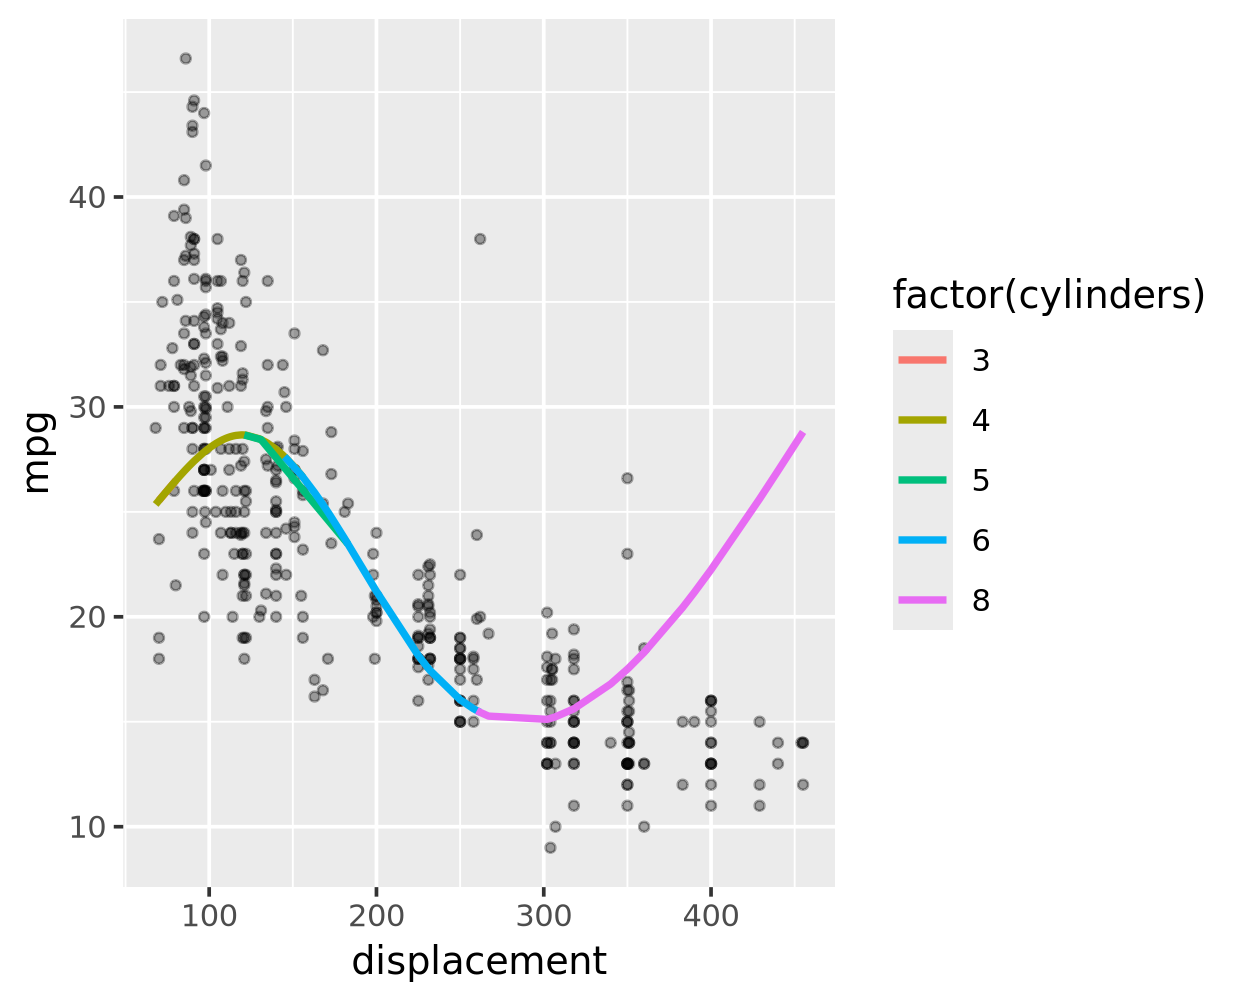

In [29]:
mod_fit1 = mod |> fit(mpg ~ displacement_ns_1, data = rec |> juice())

predict(mod_fit1, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)

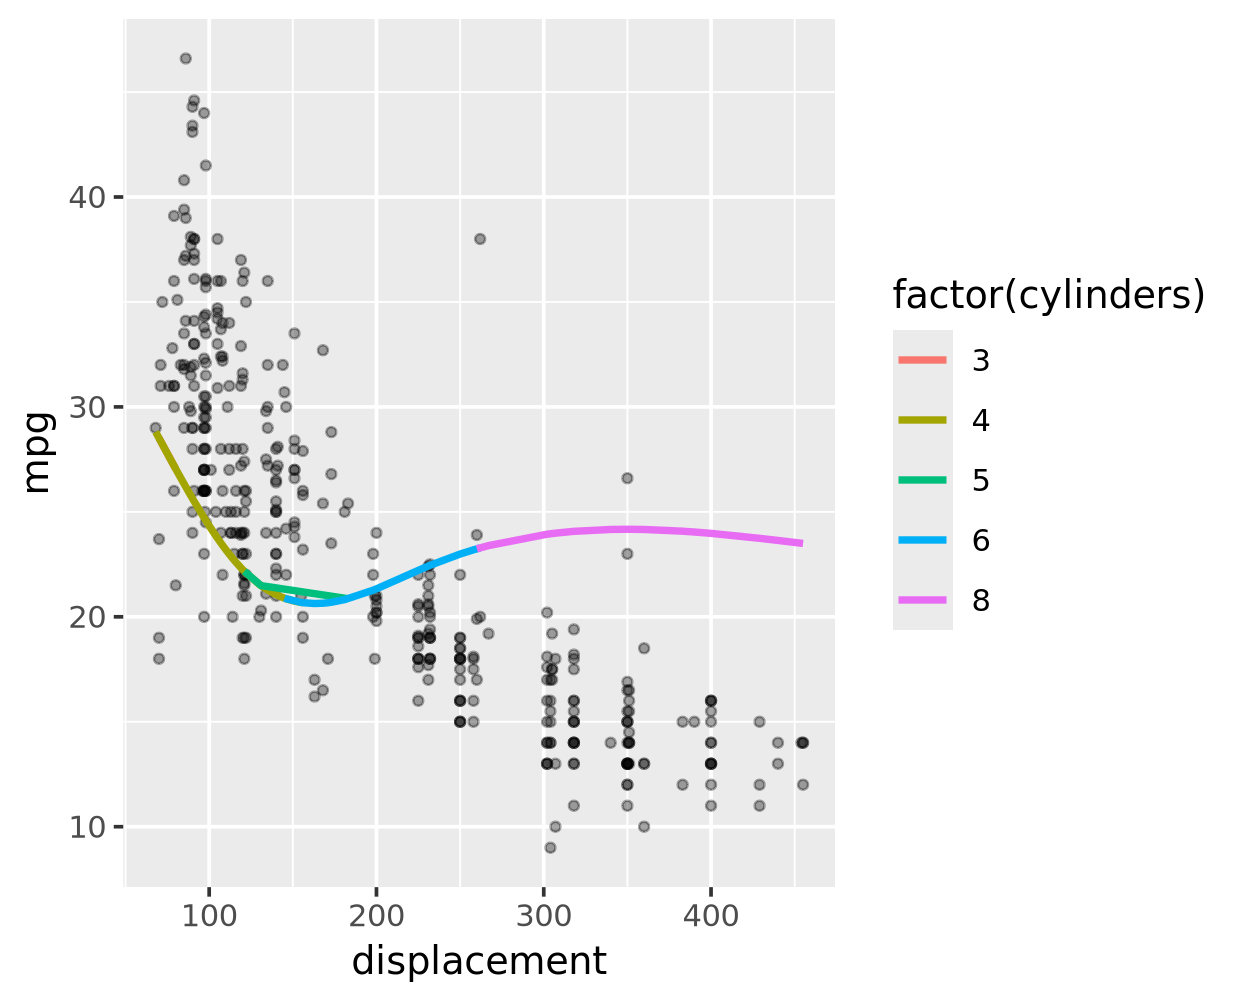

In [30]:
mod_fit2 = mod |> fit(mpg ~ displacement_ns_2, data = rec |> juice())

predict(mod_fit2, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)

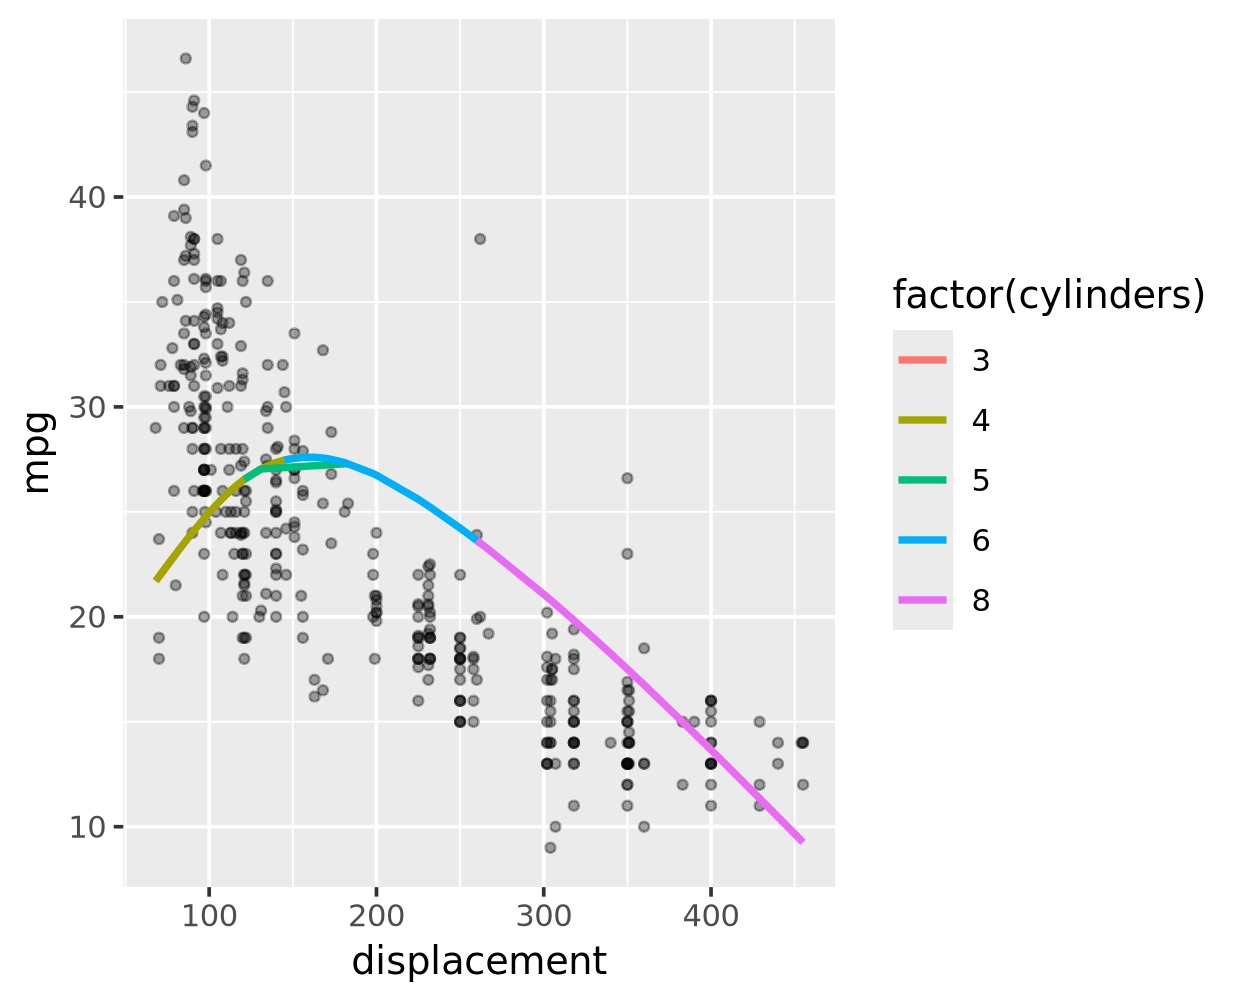

In [31]:
mod_fit3 = mod |> fit(mpg ~ displacement_ns_3, data = rec |> juice())

predict(mod_fit3, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)